In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

KeyboardInterrupt: 

In [2]:
n_samples = 10000
mean = [0, 0]  # Mean of the Gaussian
cov = [[1, 0], [0, 1]]  # Covariance matrix
data = np.random.multivariate_normal(mean, cov, n_samples)

In [ ]:
k = 3
num_iterations = 1000
norms = []

for iteration in range(num_iterations):
    kmeans = KMeans(n_clusters=k).fit(data)
    centroids = kmeans.cluster_centers_

    norm = np.linalg.norm(centroids, axis=1)
    R = np.mean(norm)
    norms.append(R)

cumulative_average = np.cumsum(norms) / np.arange(1, len(norms) + 1)

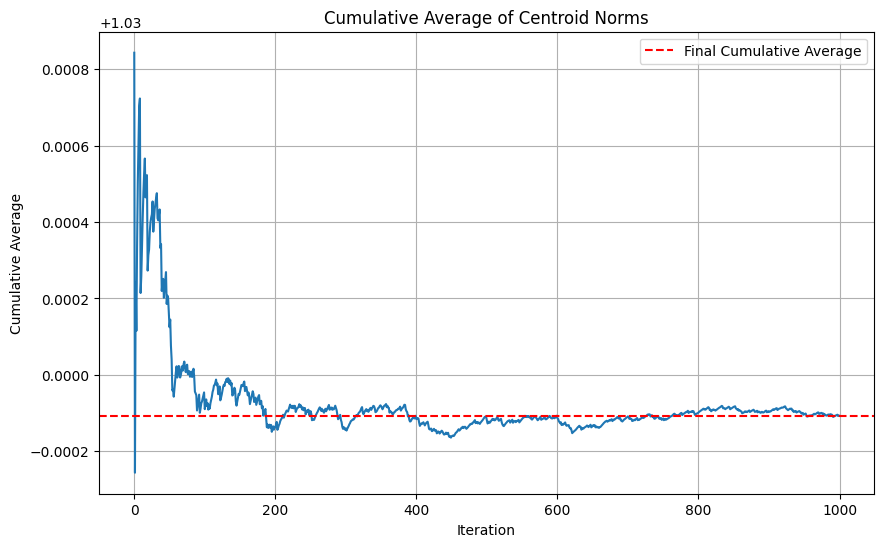

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_average)
plt.title('Cumulative Average of Centroid Norms')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Average')
plt.grid()
plt.axhline(y=cumulative_average[-1], color='r', linestyle='--', label='Final Cumulative Average')
plt.legend()
plt.show()

In [16]:
target_accuracy = 1e-9
stabilized_iteration = None

for i in range(1, len(cumulative_average)):
    if abs(cumulative_average[i] - cumulative_average[i - 1]) < target_accuracy:
        stabilized_iteration = i + 1
        break

stabilized_iteration

784